In [51]:
import os
for dirname, _, filenames in os.walk('/home/andrea/Downloads/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/andrea/Downloads/XGB -LGBMC.txt
/home/andrea/Downloads/water_dataX.csv
/home/andrea/Downloads/Water.py
/home/andrea/Downloads/cmake-3.22.0-rc2/.clang-tidy
/home/andrea/Downloads/cmake-3.22.0-rc2/CONTRIBUTING.rst
/home/andrea/Downloads/cmake-3.22.0-rc2/CMakeCPack.cmake
/home/andrea/Downloads/cmake-3.22.0-rc2/Copyright.txt
/home/andrea/Downloads/cmake-3.22.0-rc2/CMakeGraphVizOptions.cmake
/home/andrea/Downloads/cmake-3.22.0-rc2/DartConfig.cmake
/home/andrea/Downloads/cmake-3.22.0-rc2/bootstrap
/home/andrea/Downloads/cmake-3.22.0-rc2/cmake_uninstall.cmake.in
/home/andrea/Downloads/cmake-3.22.0-rc2/CompileFlags.cmake
/home/andrea/Downloads/cmake-3.22.0-rc2/README.rst
/home/andrea/Downloads/cmake-3.22.0-rc2/CTestConfig.cmake
/home/andrea/Downloads/cmake-3.22.0-rc2/doxygen.config
/home/andrea/Downloads/cmake-3.22.0-rc2/CMakeLists.txt
/home/andrea/Downloads/cmake-3.22.0-rc2/configure
/home/andrea/Downloads/cmake-3.22.0-rc2/.clang-format
/home/andrea/Downloads/cmake-3.22.0-rc2/CMakeLogo.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import probplot
from scipy.stats import zscore

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [53]:

df = pd.read_csv('/home/andrea/Downloads/Water-main/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


The percentage of waters that are potable is: 39.01%


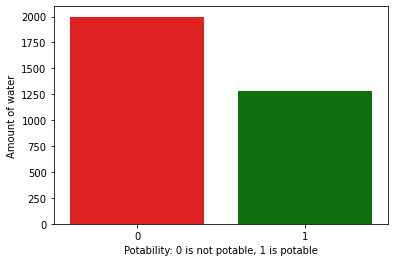

In [54]:
sns.countplot(x="Potability",data=df, palette={0:'red', 1:'green'})
plt.xlabel('Potability: 0 is not potable, 1 is potable')
plt.ylabel('Amount of water')
porc = (len(df[df.Potability==1]) / len(df.Potability)) * 100
print('The percentage of waters that are potable is: {:.2f}%'.format(porc))

In [55]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

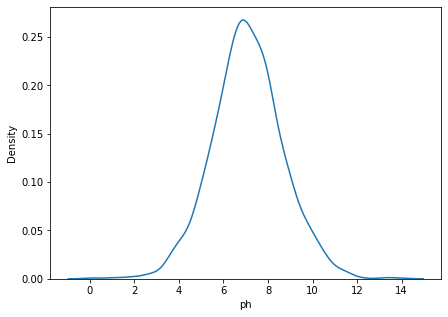

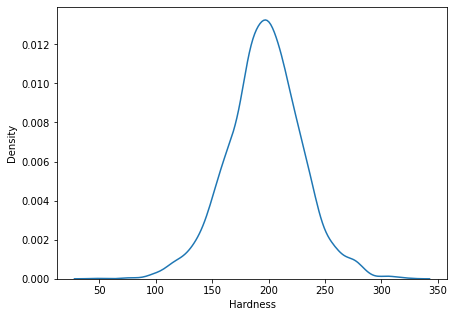

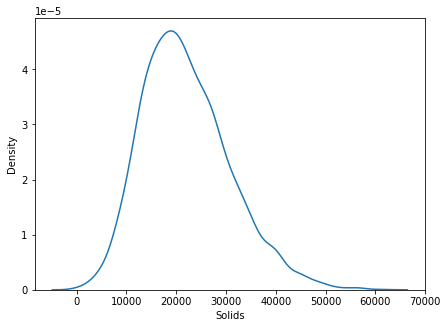

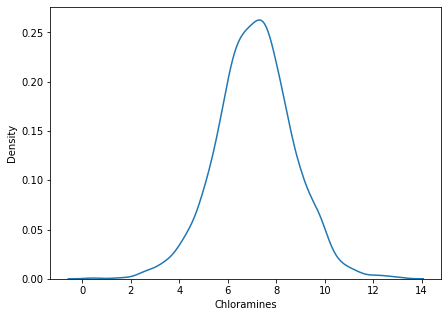

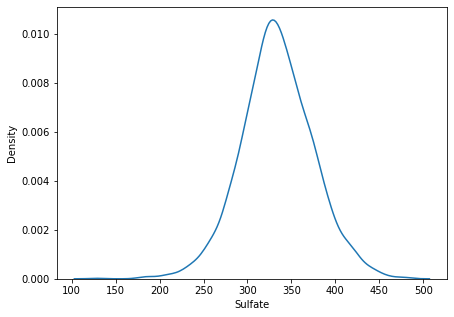

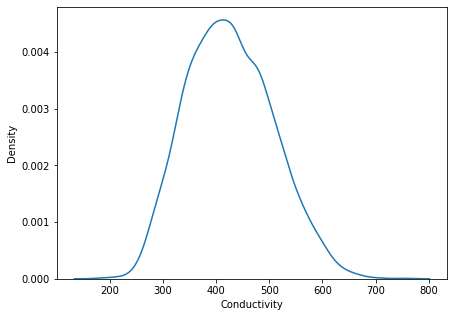

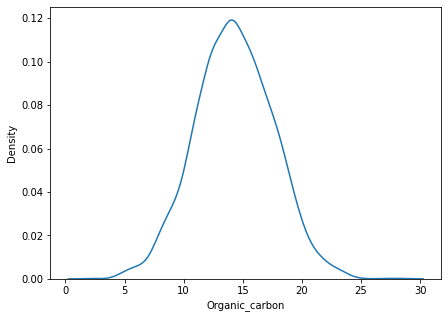

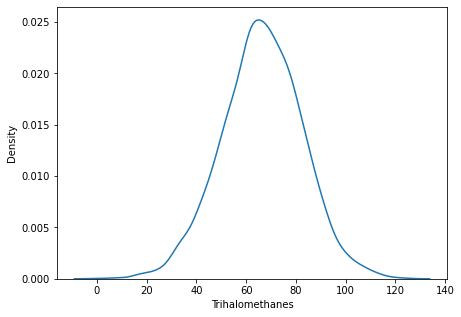

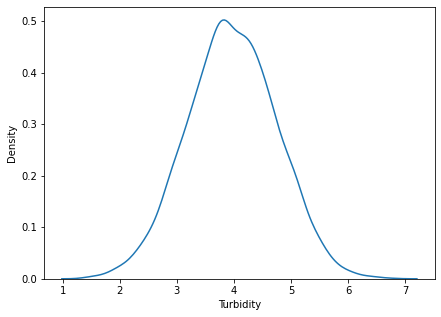

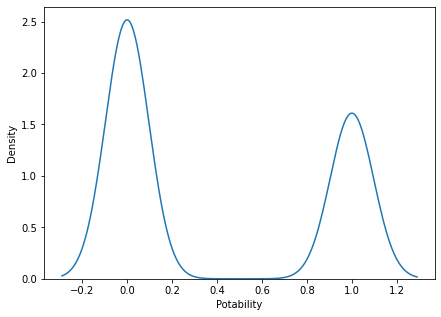

In [56]:
# PLotting PDFs of all the numeric attributes in the dataset

df_num_final = df.select_dtypes(exclude="object") #solo le feature numeriche

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

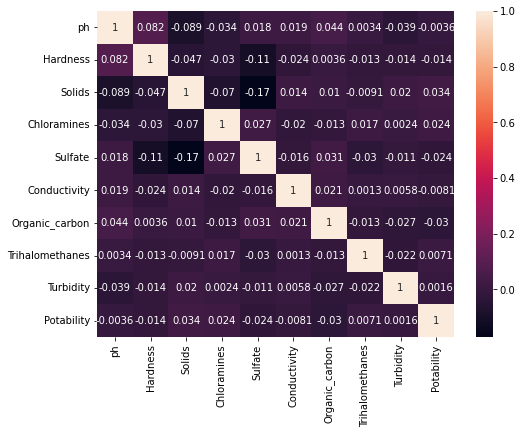

In [57]:
# Matrice di correlazione
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
# fig = go.Figure(go.Heatmap(x=df.corr().columns.tolist(), y=df.corr().columns.tolist(), z=df.corr(), colorscale='greens'))
# fig.show()

In [58]:
from sklearn.preprocessing import StandardScaler

#Standardizing The Data
sc = StandardScaler()
X = df.drop(['Potability'],axis=1)
X = sc.fit_transform(X)

In [59]:
#Visualizzazione dei valori nulli
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [60]:
# Use KNN Imputer to impute NaN Values
#per i valori nulli
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df[['ph','Sulfate','Trihalomethanes']] = imputer.fit_transform(df[['ph','Sulfate','Trihalomethanes']])


In [61]:

# classification tools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# data preprocessors, metrics and evals
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# from sklearn.utils import resample

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# importing seaborn for plotting conf matrix
import seaborn as sns

In [62]:
# Split the Dataset into Training and Test Datasets

from sklearn.model_selection import train_test_split

X = df.drop(['Potability'],axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =42)

Training score for mean :  0.6056166056166056
Accuracy score for mean:  0.6227106227106227
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       1.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.81      0.50      0.38       819
weighted avg       0.77      0.62      0.48       819



<AxesSubplot:>

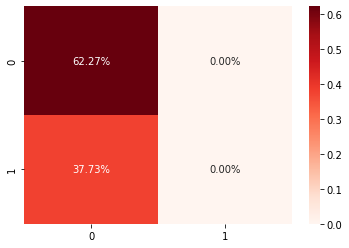

In [63]:
import matplotlib.pyplot as plt

# training 
lr = LogisticRegression(max_iter=200,random_state=42, n_jobs=20)
lr.fit(X_train,y_train)
logistic_score = lr.score(X_train,y_train)

print("Training score for mean : ", logistic_score)

# Making Prediction
pred_lr = lr.predict(X_test)
lg = accuracy_score(y_test, pred_lr)
print("Accuracy score for mean: ", lg)

# classification report for Log Reg
print(classification_report(y_test,pred_lr,zero_division=True))

# confusion Maxtrix
conf_mat_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(conf_mat_lr/np.sum(conf_mat_lr), annot = True, fmt=  '0.2%', cmap = 'Reds')

Training Score :  0.7851037851037851
Accuracy score :  0.6398046398046398
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       510
           1       0.53      0.37      0.43       309

    accuracy                           0.64       819
   macro avg       0.61      0.59      0.58       819
weighted avg       0.62      0.64      0.62       819



<AxesSubplot:>

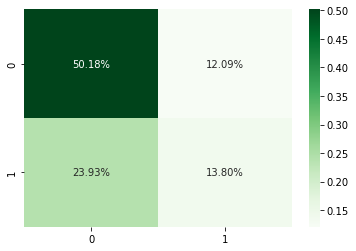

In [64]:
# Model object
dt = DecisionTreeClassifier(max_depth=9, random_state=42)

# Training Model
dt.fit(X_train,y_train)
dt_score = dt.score(X_train,y_train)
print("Training Score : ", dt_score)
# Making Prediction
pred_dt = dt.predict(X_test)

# Calculating Accuracy Score
dt_test_score = accuracy_score(y_test, pred_dt)
print("Accuracy score : ",dt_test_score)

# Classification Report
print(classification_report(y_test,pred_dt))

# confusion Maxtrix
conf_mat_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat_dt/np.sum(conf_mat_dt), annot = True, fmt=  '0.2%', cmap = 'Greens')



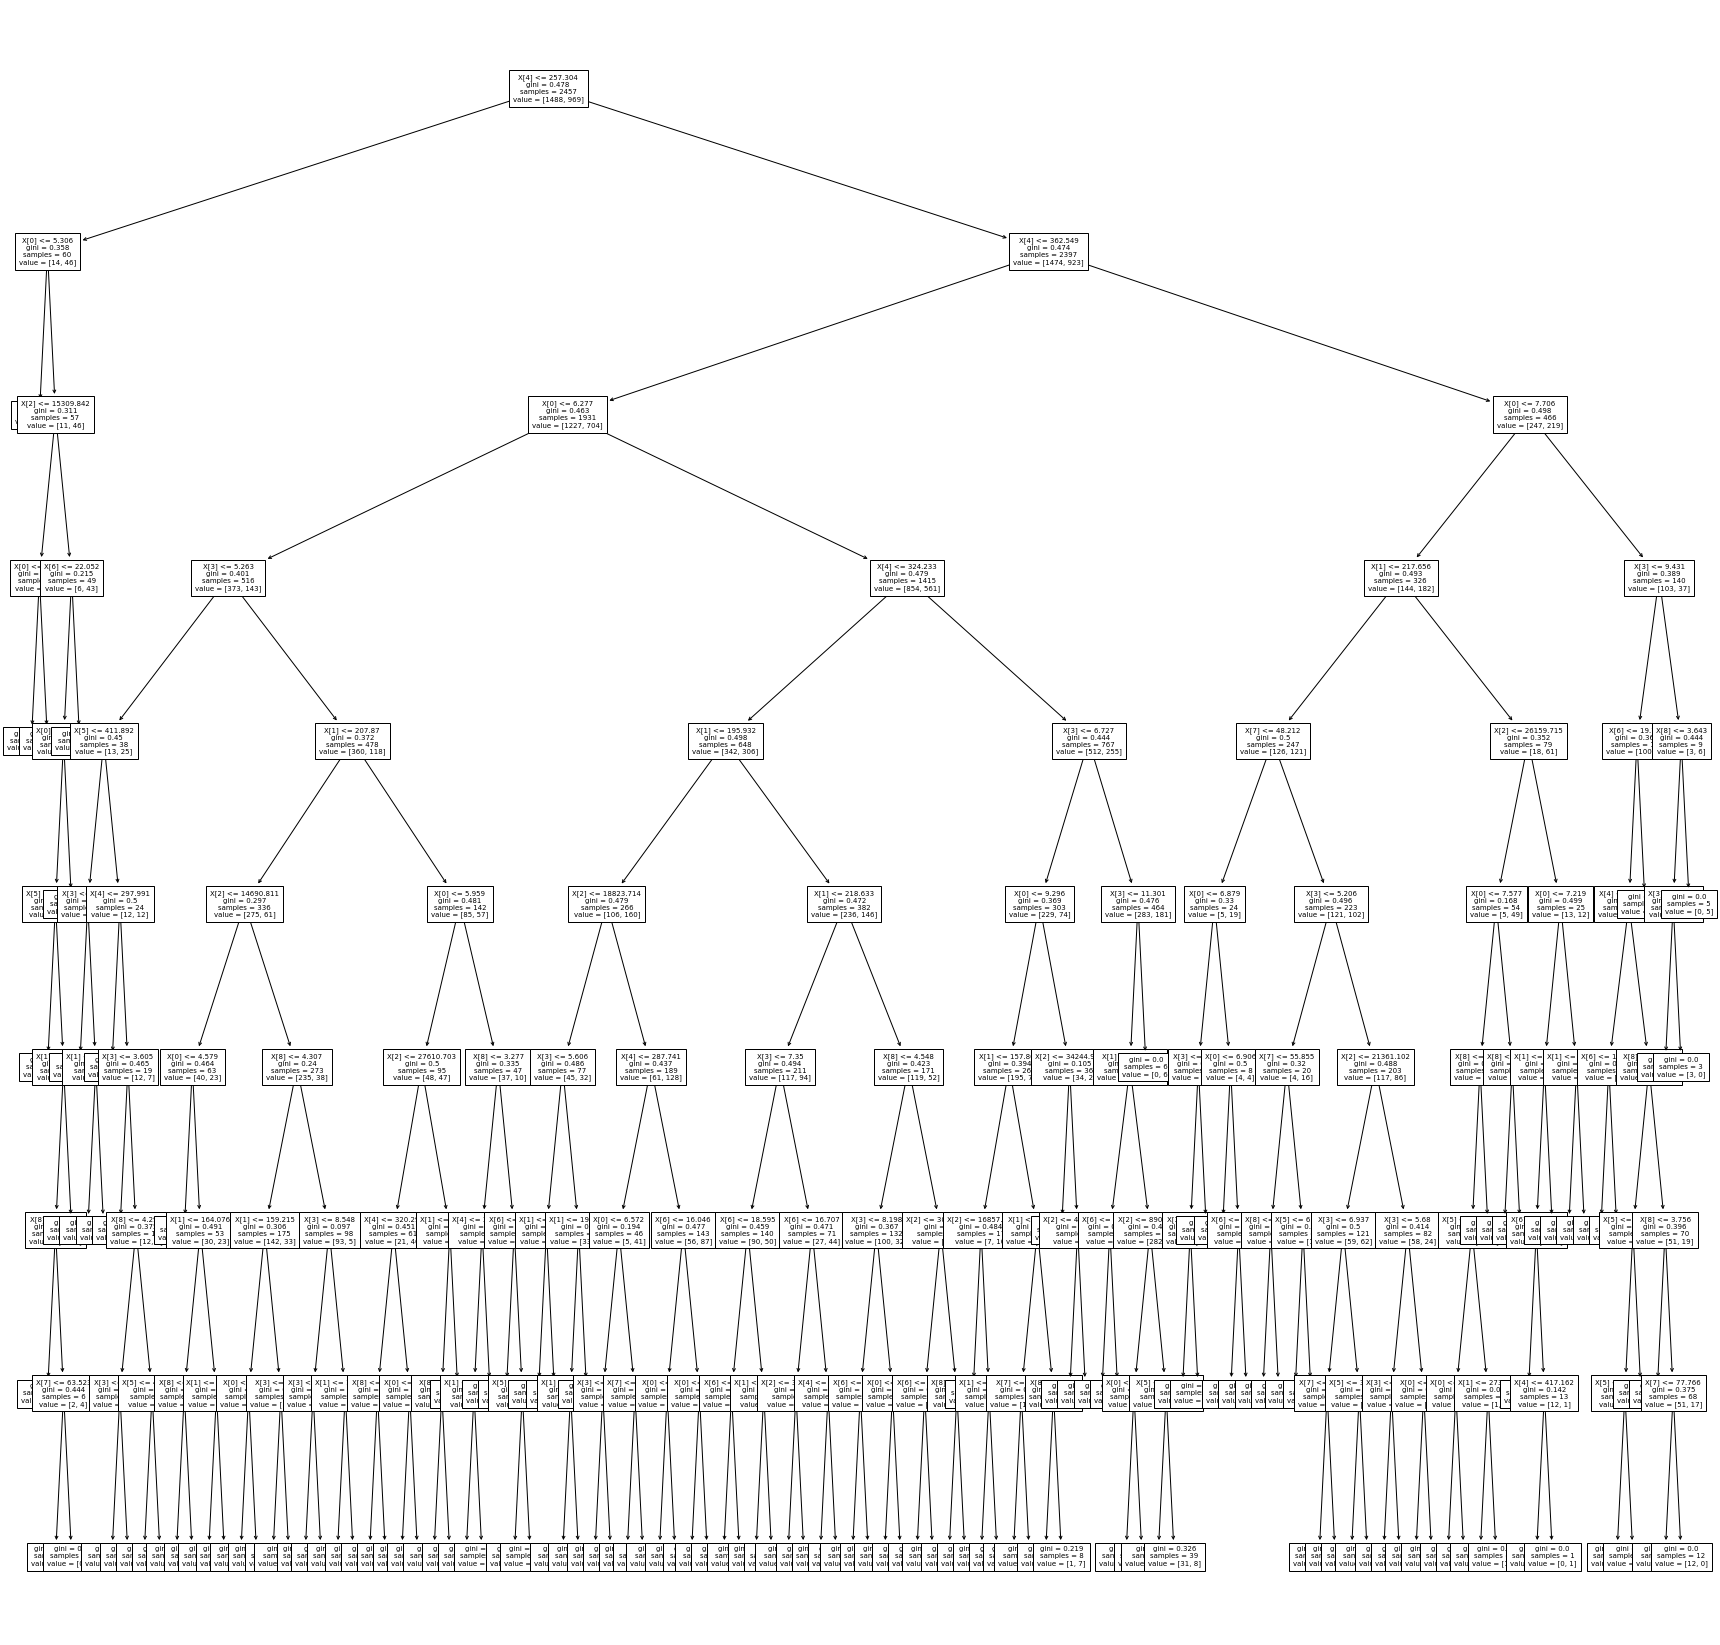

In [65]:
#print decision tree
plt.figure(figsize=(30,30))
tree.plot_tree(dt,fontsize=7)
plt.show()

Training Score :  0.8656898656898657
Accuracy score :  0.6788766788766789
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       510
           1       0.68      0.28      0.40       309

    accuracy                           0.68       819
   macro avg       0.68      0.60      0.59       819
weighted avg       0.68      0.68      0.64       819



<AxesSubplot:>

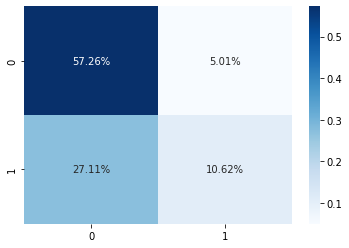

In [66]:
# training 
rfc = RandomForestClassifier(n_estimators=1000,min_samples_leaf=9, random_state=23)
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_train,y_train)
print("Training Score : ",rfc_score)


prediction_rfc = rfc.predict(X_test)
rfc_test_score = accuracy_score(y_test, prediction_rfc)
print("Accuracy score : ",rfc_test_score)


# Classification report
print(classification_report(y_test,prediction_rfc, zero_division=True))

# confusion Maxtrix
conf_mat_rfc = confusion_matrix(y_test, prediction_rfc)
sns.heatmap(conf_mat_rfc/np.sum(conf_mat_rfc), annot = True, fmt=  '0.2%', cmap = 'Blues')

Training Score :  0.608058608058608
Accuracy score :  0.63003663003663
              precision    recall  f1-score   support

           0       0.64      0.95      0.76       510
           1       0.56      0.10      0.17       309

    accuracy                           0.63       819
   macro avg       0.60      0.53      0.46       819
weighted avg       0.61      0.63      0.54       819



<AxesSubplot:>

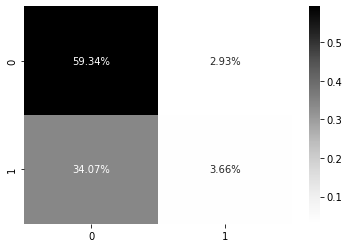

In [67]:
# training 
lsvc = LinearSVC(max_iter=100000)
lsvc.fit(X_train,y_train)
lsvc_score = lsvc.score(X_train,y_train)

print("Training Score : ",lsvc_score)

prediction_lsvc = lsvc.predict(X_test)
lsvc_test_score = accuracy_score(y_test, prediction_lsvc)
print("Accuracy score : ",lsvc_test_score)


# Classification report
print(classification_report(y_test,prediction_lsvc, zero_division=True))

# confusion Maxtrix
conf_mat_lsvc = confusion_matrix(y_test,prediction_lsvc)
sns.heatmap(conf_mat_lsvc/np.sum(conf_mat_lsvc), annot = True, fmt=  '0.2%', cmap = 'Greys')

Training Score :  0.6113146113146113
Accuracy score :  0.6117216117216118
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       510
           1       0.40      0.06      0.10       309

    accuracy                           0.61       819
   macro avg       0.51      0.50      0.42       819
weighted avg       0.54      0.61      0.51       819



<AxesSubplot:>

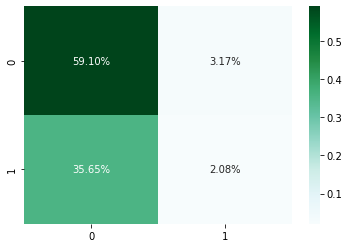

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Model object - 9 neighbors
knn = KNeighborsClassifier(n_neighbors=42, leaf_size=1800)

# Training Model
knn.fit(X_train, y_train)

# Training score
knn_score = knn.score(X_train,y_train)
print("Training Score : ",knn_score)

# Making Prediction
predict_knn = knn.predict(X_test)

knn_test_score = accuracy_score(y_test, predict_knn)
print("Accuracy score : ",knn_test_score)


# Classification report
print(classification_report(y_test,predict_knn, zero_division=True))

# confusion Maxtrix
conf_mat_knn = confusion_matrix(y_test,predict_knn)
sns.heatmap(conf_mat_knn/np.sum(conf_mat_knn), annot = True, fmt=  '0.2%', cmap = 'BuGn')

Training Score :  0.6255596255596255
Accuracy score :  0.6385836385836385
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       510
           1       0.56      0.21      0.30       309

    accuracy                           0.64       819
   macro avg       0.60      0.55      0.53       819
weighted avg       0.62      0.64      0.58       819



<AxesSubplot:>

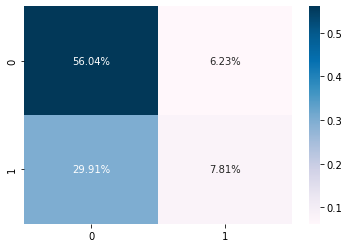

In [69]:
# Model object 
gnb = GaussianNB()
# Training Model
gnb.fit(X_train, y_train)

# Training score
gnb_score = gnb.score(X_train,y_train)
print("Training Score : ",gnb_score)

# Making Prediction
predict_gnb = gnb.predict(X_test)

gnb_test_score = accuracy_score(y_test, predict_gnb)
print("Accuracy score : ",gnb_test_score)


# Classification report
print(classification_report(y_test,predict_gnb, zero_division=True))

# confusion Maxtrix
conf_mat_gnb = confusion_matrix(y_test,predict_gnb)
sns.heatmap(conf_mat_gnb/np.sum(conf_mat_gnb), annot = True, fmt=  '0.2%', cmap = 'PuBu')

Training Score :  0.7488807488807488
Accuracy score :  0.663003663003663
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       510
           1       0.62      0.27      0.38       309

    accuracy                           0.66       819
   macro avg       0.65      0.59      0.57       819
weighted avg       0.65      0.66      0.62       819



<AxesSubplot:>

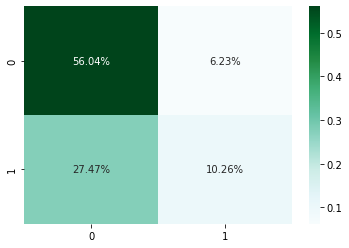

In [70]:
# Model object 
gbm=GradientBoostingClassifier(random_state=42)

# Training Model
gbm.fit(X_train, y_train)

# Training score
gbm_score = gbm.score(X_train,y_train)
print("Training Score : ",gbm_score)

# Making Prediction
predict_gbm = gbm.predict(X_test)

gbm_test_score = accuracy_score(y_test, predict_gbm)
print("Accuracy score : ",gbm_test_score)


# Classification report
print(classification_report(y_test,predict_gbm, zero_division=True))

# confusion Maxtrix
conf_mat_gbm = confusion_matrix(y_test,predict_gbm)
sns.heatmap(conf_mat_gbm/np.sum(conf_mat_gbm), annot = True, fmt=  '0.2%', cmap = 'BuGn')

Training Score :  0.8917378917378918
Accuracy score :  0.6825396825396826
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       510
           1       0.64      0.37      0.47       309

    accuracy                           0.68       819
   macro avg       0.67      0.62      0.62       819
weighted avg       0.67      0.68      0.66       819



<AxesSubplot:>

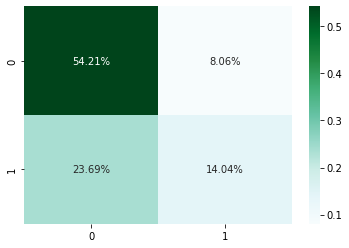

In [71]:
# Tuned Model #MANCA IL PEZZO IN CUI TROVA I PARAMETRI MIGLIORI, MA MOLTO LUNGO
gbm_tuned=GradientBoostingClassifier(random_state=42,learning_rate=0.1,max_depth=5,n_estimators=100)
# Train
gbm_tuned.fit(X_train,y_train)

# Training score
gbm_tuned_score = gbm_tuned.score(X_train,y_train)
print("Training Score : ",gbm_tuned_score)


gbm_tuned_pred = gbm_tuned.predict(X_test)


gbm_tuned_test_score = accuracy_score(y_test, gbm_tuned_pred)
print("Accuracy score : ",gbm_tuned_test_score)


# Classification report
print(classification_report(y_test, gbm_tuned_pred, zero_division=True))

# confusion Maxtrix
conf_mat_gbm_tuned = confusion_matrix(y_test, gbm_tuned_pred)
sns.heatmap(conf_mat_gbm_tuned/np.sum(conf_mat_gbm_tuned), annot = True, fmt=  '0.2%', cmap = 'BuGn')

Training Score :  0.5938135938135938
Accuracy score :  0.612942612942613
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       510
           1       0.44      0.09      0.15       309

    accuracy                           0.61       819
   macro avg       0.53      0.51      0.45       819
weighted avg       0.56      0.61      0.52       819



<AxesSubplot:>

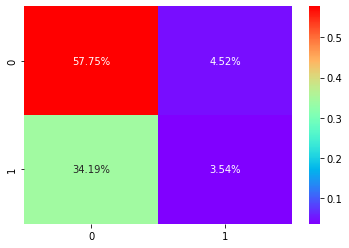

In [72]:
#ARTIFICIAL NEURAL NETWORK

# Model Multi-Layer Perceptron
mlp=MLPClassifier(hidden_layer_sizes=90, max_iter=1600)
# Train
mlp.fit(X_train,y_train)

# Training score
mlp_score =mlp.score(X_train,y_train)
print("Training Score : ",mlp_score)


mlp_pred = mlp.predict(X_test)


mlp_test_score = accuracy_score(y_test, mlp_pred)
print("Accuracy score : ",mlp_test_score)


# Classification report
print(classification_report(y_test, mlp_pred, zero_division=True))

# confusion Maxtrix
conf_mat_mlp = confusion_matrix(y_test, mlp_pred)
sns.heatmap(conf_mat_mlp/np.sum(conf_mat_mlp), annot = True, fmt=  '0.2%', cmap = 'rainbow')

Training Score :  0.9979649979649979
Accuracy score :  0.6703296703296703
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       510
           1       0.59      0.42      0.49       309

    accuracy                           0.67       819
   macro avg       0.64      0.62      0.62       819
weighted avg       0.66      0.67      0.66       819



<AxesSubplot:>

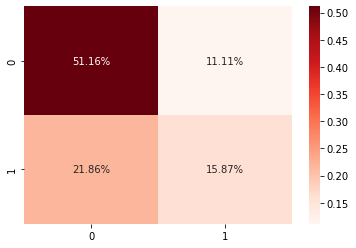

In [81]:
# Model
xgb_model = XGBClassifier(eval_metric="rmse",use_label_encoder=False)
# Train
xgb_model.fit(X_train,y_train)

# Training score
xgb_score = xgb_model.score(X_train,y_train)
print("Training Score : ",xgb_score)


xgb_pred = xgb_model.predict(X_test)


xgb_test_score = accuracy_score(y_test, xgb_pred)
print("Accuracy score : ",xgb_test_score)


# Classification report
print(classification_report(y_test, xgb_pred, zero_division=True))

# confusion Maxtrix
conf_mat_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_mat_xgb/np.sum(conf_mat_xgb), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [82]:
xgb_params={"n_estimators":[5,50,250,500],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[4,5,6,9],
           "learning_rate":[0.01,0.1,1,2],
           }

xgb_model=GradientBoostingClassifier(random_state=42)
xgb_cv_model=GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_cv_model.fit(X_train,y_train)

xgb_cv_model.best_params_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 250, 'subsample': 0.8}

Training Score :  0.9157509157509157
Accuracy score :  0.6898656898656899
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       510
           1       0.66      0.36      0.47       309

    accuracy                           0.69       819
   macro avg       0.68      0.62      0.62       819
weighted avg       0.68      0.69      0.66       819



<AxesSubplot:>

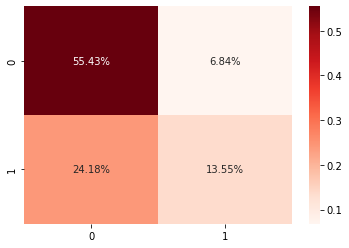

In [83]:
# Tuned Model
xgb_tuned_model =  XGBClassifier(use_label_encoder=False,eval_metric="rmse",learning_rate=0.01,max_depth=9,n_estimators=250,subsample=0.8)
# Train
xgb_tuned_model.fit(X_train,y_train)

# Training score
xgb_tuned_score = xgb_tuned_model.score(X_train,y_train)
print("Training Score : ",xgb_tuned_score)


xgb_tuned_pred = xgb_tuned_model.predict(X_test)


xgb_tuned_test_score = accuracy_score(y_test, xgb_tuned_pred)
print("Accuracy score : ",xgb_tuned_test_score)


# Classification report
print(classification_report(y_test, xgb_tuned_pred, zero_division=True))

# confusion Maxtrix
conf_mat_xgb_tuned = confusion_matrix(y_test, xgb_tuned_pred)
sns.heatmap(conf_mat_xgb_tuned/np.sum(conf_mat_xgb_tuned), annot = True, fmt=  '0.2%', cmap = 'Reds')

Training Score :  0.9719169719169719
Accuracy score :  0.6813186813186813
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       510
           1       0.62      0.39      0.48       309

    accuracy                           0.68       819
   macro avg       0.66      0.62      0.63       819
weighted avg       0.67      0.68      0.66       819



<AxesSubplot:>

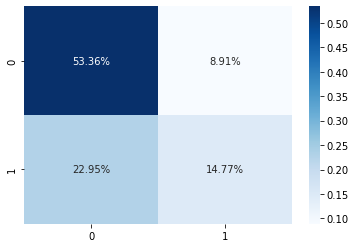

In [84]:
# Model
lightgbm_model = LGBMClassifier()
# Train
lightgbm_model.fit(X_train,y_train)

# Training score
lightgbm_score = lightgbm_model.score(X_train,y_train)
print("Training Score : ",lightgbm_score)


lightgbm_pred = lightgbm_model.predict(X_test)


lightgbm_test_score = accuracy_score(y_test, lightgbm_pred)
print("Accuracy score : ",lightgbm_test_score)


# Classification report
print(classification_report(y_test, lightgbm_pred, zero_division=True))

# confusion Maxtrix
conf_mat_lightgbm = confusion_matrix(y_test, lightgbm_pred)
sns.heatmap(conf_mat_lightgbm/np.sum(conf_mat_lightgbm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [85]:
lightgbm_params = {"n_estimators":[90,450,900],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6,9],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_child_samples":[5,9,10,20]}

lightgbm_model = LGBMClassifier()
lightgbm_cv_model = GridSearchCV(lightgbm_model,lightgbm_params,cv=10,n_jobs=-1,verbose=2)
lightgbm_cv_model.fit(X_train,y_train)
lightgbm_cv_model.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'learning_rate': 0.05,
 'max_depth': 9,
 'min_child_samples': 9,
 'n_estimators': 90,
 'subsample': 0.6}

Training Score :  0.8685388685388685
Accuracy score :  0.684981684981685
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       510
           1       0.66      0.35      0.45       309

    accuracy                           0.68       819
   macro avg       0.67      0.62      0.62       819
weighted avg       0.68      0.68      0.66       819



<AxesSubplot:>

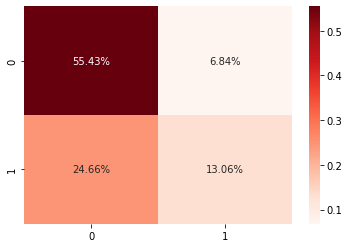

In [86]:
# Tuned Model
lightgbm_tuned_model = LGBMClassifier(learning_rate=0.05,max_depth=9,n_estimators=90, min_child_samples=9,subsample=0.6)
# Train
lightgbm_tuned_model.fit(X_train,y_train)

# Training score
lightgbm_tuned_score = lightgbm_tuned_model.score(X_train,y_train)
print("Training Score : ",lightgbm_tuned_score)


lightgbm_tuned_pred = lightgbm_tuned_model.predict(X_test)


lightgbm_tuned_test_score = accuracy_score(y_test, lightgbm_tuned_pred)
print("Accuracy score : ",lightgbm_tuned_test_score)


# Classification report
print(classification_report(y_test, lightgbm_tuned_pred, zero_division=True))

# confusion Maxtrix
conf_mat_lightgbm_tuned = confusion_matrix(y_test, lightgbm_tuned_pred)
sns.heatmap(conf_mat_lightgbm_tuned/np.sum(conf_mat_lightgbm_tuned), annot = True, fmt=  '0.2%', cmap = 'Reds')

Learning rate set to 0.015123
0:	learn: 0.6914814	total: 5.71ms	remaining: 5.7s
1:	learn: 0.6903172	total: 8.77ms	remaining: 4.38s
2:	learn: 0.6884093	total: 11.3ms	remaining: 3.75s
3:	learn: 0.6870163	total: 13ms	remaining: 3.23s
4:	learn: 0.6854479	total: 14.8ms	remaining: 2.94s
5:	learn: 0.6841568	total: 17.7ms	remaining: 2.94s
6:	learn: 0.6826779	total: 19.4ms	remaining: 2.75s
7:	learn: 0.6810793	total: 21.1ms	remaining: 2.61s
8:	learn: 0.6794877	total: 22.6ms	remaining: 2.49s
9:	learn: 0.6781440	total: 24.2ms	remaining: 2.39s
10:	learn: 0.6768259	total: 25.7ms	remaining: 2.31s
11:	learn: 0.6752962	total: 27.2ms	remaining: 2.24s
12:	learn: 0.6738972	total: 30ms	remaining: 2.28s
13:	learn: 0.6726319	total: 31.5ms	remaining: 2.22s
14:	learn: 0.6713452	total: 32.9ms	remaining: 2.16s
15:	learn: 0.6700099	total: 34.3ms	remaining: 2.11s
16:	learn: 0.6683753	total: 35.7ms	remaining: 2.06s
17:	learn: 0.6668685	total: 37.2ms	remaining: 2.03s
18:	learn: 0.6652355	total: 38.6ms	remaining: 1.9

<AxesSubplot:>

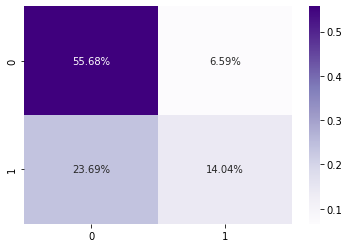

In [73]:
# Model
cb_model = CatBoostClassifier()
# Train
cb_model.fit(X_train,y_train)

# Training score
cb_score = cb_model.score(X_train,y_train)
print("Training Score : ",cb_score)


cb_pred = cb_model.predict(X_test)


cb_test_score = accuracy_score(y_test, cb_pred)
print("Accuracy score : ",cb_test_score)


# Classification report
print(classification_report(y_test, cb_pred, zero_division=True))

# confusion Maxtrix
conf_mat_cb = confusion_matrix(y_test, cb_pred)
sns.heatmap(conf_mat_cb/np.sum(conf_mat_cb), annot = True, fmt=  '0.2%', cmap = 'Purples')

In [87]:
cb_params={"iterations":[300,600,900],
            "learning_rate":[0.01,0.05,0.1],
            "depth":[3,6,9]}
cb_model =CatBoostClassifier()
cb_cv_model=GridSearchCV(cb_model,cb_params,cv=5,n_jobs=-1,verbose=2)
cb_cv_model.fit(X_train,y_train)

cb_cv_model.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6908581	total: 13.6ms	remaining: 8.12s
1:	learn: 0.6888159	total: 26.8ms	remaining: 8.01s
2:	learn: 0.6868334	total: 37.3ms	remaining: 7.42s
3:	learn: 0.6849084	total: 48.4ms	remaining: 7.22s
4:	learn: 0.6833789	total: 58.3ms	remaining: 6.94s
5:	learn: 0.6813435	total: 69.4ms	remaining: 6.87s
6:	learn: 0.6797614	total: 79.6ms	remaining: 6.74s
7:	learn: 0.6782688	total: 90ms	remaining: 6.66s
8:	learn: 0.6765304	total: 101ms	remaining: 6.61s
9:	learn: 0.6744878	total: 113ms	remaining: 6.64s
10:	learn: 0.6724654	total: 125ms	remaining: 6.72s
11:	learn: 0.6701760	total: 137ms	remaining: 6.7s
12:	learn: 0.6684351	total: 147ms	remaining: 6.65s
13:	learn: 0.6663936	total: 158ms	remaining: 6.61s
14:	learn: 0.6648333	total: 169ms	remaining: 6.59s
15:	learn: 0.6635292	total: 180ms	remaining: 6.57s
16:	learn: 0.6619215	total: 190ms	remaining: 6.52s
17:	learn: 0.6604119	total: 202ms	remaining: 6.53s
18:	learn: 0.6588013	tota

{'depth': 9, 'iterations': 600, 'learning_rate': 0.01}

0:	learn: 0.6913906	total: 19.4ms	remaining: 11.6s
1:	learn: 0.6897341	total: 34.9ms	remaining: 10.4s
2:	learn: 0.6877256	total: 46.9ms	remaining: 9.33s
3:	learn: 0.6864451	total: 59.5ms	remaining: 8.86s
4:	learn: 0.6849983	total: 69.8ms	remaining: 8.3s
5:	learn: 0.6831349	total: 84.2ms	remaining: 8.33s
6:	learn: 0.6813563	total: 97.6ms	remaining: 8.27s
7:	learn: 0.6795077	total: 109ms	remaining: 8.09s
8:	learn: 0.6780217	total: 121ms	remaining: 7.93s
9:	learn: 0.6758119	total: 131ms	remaining: 7.74s
10:	learn: 0.6736987	total: 142ms	remaining: 7.61s
11:	learn: 0.6722385	total: 156ms	remaining: 7.63s
12:	learn: 0.6704862	total: 170ms	remaining: 7.69s
13:	learn: 0.6686000	total: 180ms	remaining: 7.55s
14:	learn: 0.6669913	total: 192ms	remaining: 7.49s
15:	learn: 0.6651809	total: 203ms	remaining: 7.42s
16:	learn: 0.6635179	total: 217ms	remaining: 7.44s
17:	learn: 0.6625099	total: 234ms	remaining: 7.57s
18:	learn: 0.6609961	total: 247ms	remaining: 7.54s
19:	learn: 0.6594678	total: 265ms	r

<AxesSubplot:>

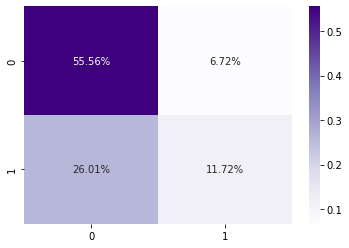

In [88]:
# Model
cb_tuned_model = CatBoostClassifier(random_state=42, depth=9, iterations=600, learning_rate=0.01)
# Train
cb_tuned_model.fit(X_train,y_train)

# Training score
cb_tuned_score = cb_tuned_model.score(X_train,y_train)
print("Training Score : ",cb_tuned_score)


cb_tuned_pred = cb_tuned_model.predict(X_test)


cb_tuned_test_score = accuracy_score(y_test, cb_tuned_pred)
print("Accuracy score : ",cb_tuned_test_score)


# Classification report
print(classification_report(y_test, cb_tuned_pred, zero_division=True))

# confusion Maxtrix
conf_mat_cb_tuned = confusion_matrix(y_test, cb_tuned_pred)
sns.heatmap(conf_mat_cb_tuned/np.sum(conf_mat_cb_tuned), annot = True, fmt=  '0.2%', cmap = 'Purples')

Learning rate set to 0.015123
0:	learn: 0.6914814	total: 4.07ms	remaining: 4.07s
1:	learn: 0.6903172	total: 7.55ms	remaining: 3.77s
2:	learn: 0.6884093	total: 10.7ms	remaining: 3.56s
3:	learn: 0.6870163	total: 13.4ms	remaining: 3.33s
4:	learn: 0.6854479	total: 15.5ms	remaining: 3.08s
5:	learn: 0.6841568	total: 17.2ms	remaining: 2.85s
6:	learn: 0.6826779	total: 19.1ms	remaining: 2.71s
7:	learn: 0.6810793	total: 20.8ms	remaining: 2.58s
8:	learn: 0.6794877	total: 22.3ms	remaining: 2.46s
9:	learn: 0.6781440	total: 23.8ms	remaining: 2.36s
10:	learn: 0.6768259	total: 25.3ms	remaining: 2.28s
11:	learn: 0.6752962	total: 26.7ms	remaining: 2.2s
12:	learn: 0.6738972	total: 28.1ms	remaining: 2.13s
13:	learn: 0.6726319	total: 29.6ms	remaining: 2.09s
14:	learn: 0.6713452	total: 32ms	remaining: 2.1s
15:	learn: 0.6700099	total: 33.6ms	remaining: 2.07s
16:	learn: 0.6683753	total: 35.2ms	remaining: 2.04s
17:	learn: 0.6668685	total: 36.9ms	remaining: 2.01s
18:	learn: 0.6652355	total: 38.4ms	remaining: 1.

<AxesSubplot:xlabel='Accuracy', ylabel='Models'>

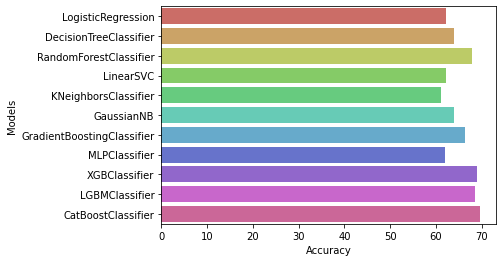

In [99]:
models=[ lr,
         dt,
         rfc,
         lsvc,
         knn,
         gnb,
         gbm,
         mlp,
         xgb_tuned_model,
         lightgbm_tuned_model,
         cb_model,
         ]


result=[]

results=pd.DataFrame(columns=["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    fit = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    result = pd.DataFrame([[names,accuracy*100]],columns=["Models","Accuracy"])
    results = results.append(result)
    
# results = results.sort_values('Accuracy').reset_index()

sns.barplot(x="Accuracy",y="Models",data=results,palette='hls')

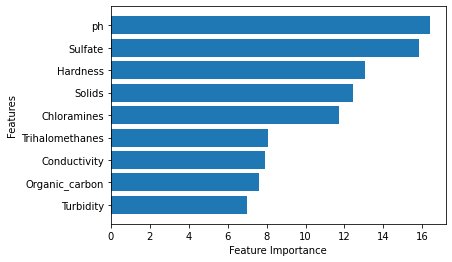

In [76]:
# Mette in ordine le feature
def plot_features(columns, importances,n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    
plot_features(df.drop(['Potability'],axis=1).columns, model.feature_importances_)


In [77]:
#RANDOM FOREST RISTRETTO
forest= RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_train[['Sulfate','ph']],y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [78]:
#Essendo le feature più importanti, l'utente può inserire i valori e farne una predizione
Sulfate= input("Indica il valore di solfato: ")
ph= input("Indica il valore di ph: ")
forest.predict([[ Sulfate,ph]])


Indica il valore di solfato: 5
Indica il valore di ph: 8


array([1])

In [79]:
#Precisione della predizione
forest.predict_proba([[800,9]])

array([[0.885, 0.115]])